## Import things

In [53]:
# Numerical
import numpy as np


# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier



# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


# Tools
from collections import defaultdict
import os, sys, csv

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_selection import VarianceThreshold
from scipy.fftpack import fft, dct

from scipy.io import wavfile
from librosa.feature import mfcc


# Graphics
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import librosa.display
%matplotlib inline


# Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


# Audio notificaions
from IPython.display import Audio
sound_file = '/System/Library/Sounds/Hero.aiff'

## Exercize 2.2

### 1) Import data

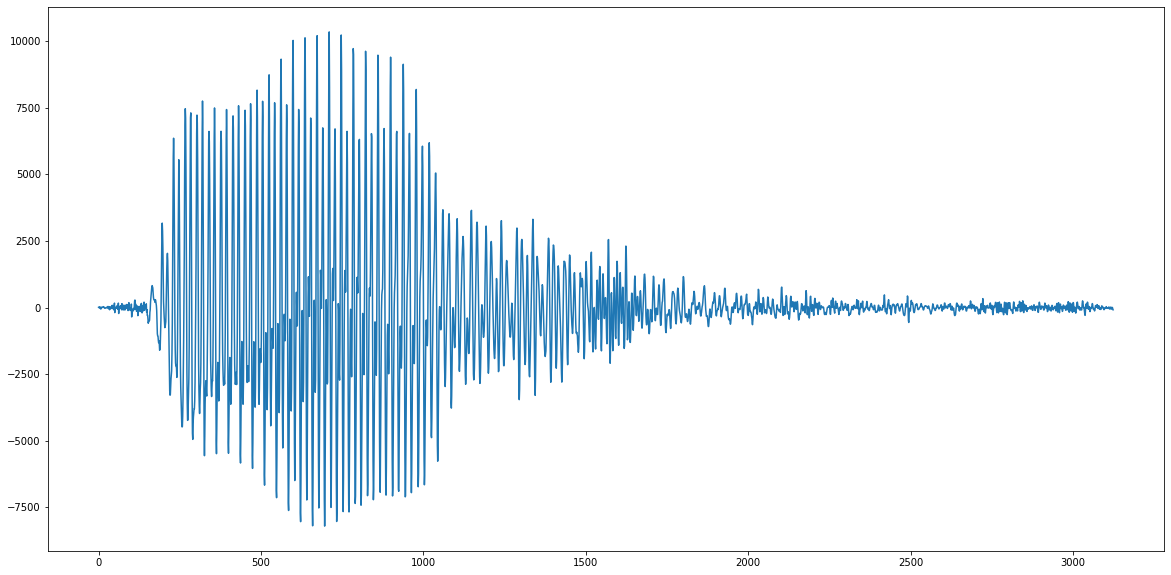

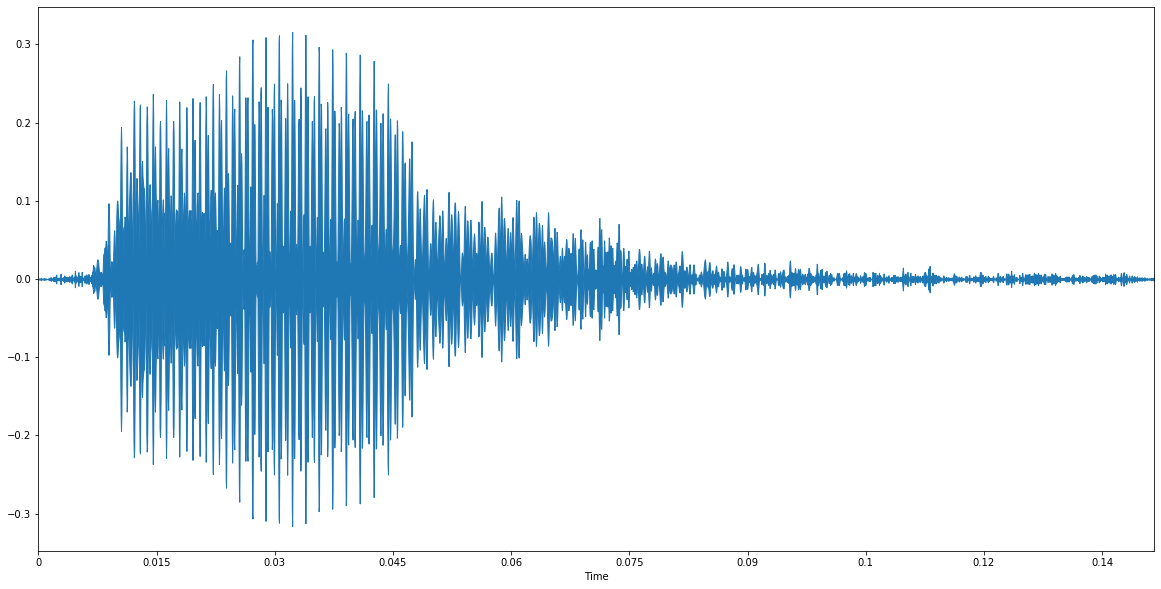

500

In [2]:
# Load files names in folders
train_directory = "/Users/lpdef/Desktop/Polito/Data Science lab process and methods/Laboratory/Lab7/free-spoken-digit/dev/"
test_directory = "/Users/lpdef/Desktop/Polito/Data Science lab process and methods/Laboratory/Lab7/free-spoken-digit/eval/"
train_name_files = os.listdir(train_directory)
test_name_files = os.listdir(test_directory)

# Sort files
train_name_files.sort(key=lambda x: int(x.split("_")[0]))
test_name_files.sort(key=lambda x: int(x.split(".")[0]))

# Compute length
train_size = len(train_name_files)
test_size = len(test_name_files)

# Load files
def loadTrain(files_name, directory, train, labels) :
    for i, file_name in enumerate(train_name_files):   
        rate, arr = wavfile.read(directory + file_name)
        train.append(arr)
        labels[i] = (file_name.split("_")[1]).split(".")[0]
        
def loadTest(files_name, directory, test):
    for i, file_name in enumerate(test_name_files):
        rate, arr = wavfile.read(directory + file_name)
        test.append(arr)


X_train = []
y_train = np.empty(train_size, dtype=int)
X_test = []

loadTrain(train_name_files, train_directory, X_train, y_train)
loadTest(test_name_files, test_directory, X_test)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(X_train[0])
# librosa.display.waveplot(np.array(list(map(lambda x: float(x/max(X_train[0][1])), X_train[0][1])),dtype=float))
plt.show()


fig, ax = plt.subplots(figsize=(20, 10))
librosa.display.waveplot(np.array(list(map(lambda x: float(x/32768), X_train[0])),dtype=float))
plt.show()


# audio0 = np.array(list(map(lambda x: float(x/32768), X_train[0])),dtype=float)
# audio0 = np.array(list(map(lambda x: 0 if abs(x) < 0.04 else x, audio0)), dtype=float)
# wavfile.write("yolo.wav",8000,audio0)
# fig, ax = plt.subplots(figsize=(20, 10))
# ax.plot(audio0)
# plt.show()

max_size = 0
for i, elem in enumerate(X_train):
    if elem.shape[0] > max_size:
        max_size = elem.shape[0]
        i_max = i

padded = []
def zero_padding(data):
    for elem in data:
        padding_size = max_size-elem.shape[0]
        padded.append(np.pad(elem, (0,padding_size), 'constant', constant_values=0))
        

zero_padding(X_train)

# fig, ax = plt.subplots(figsize=(20, 10))
# librosa.display.waveplot(np.array(list(map(lambda x: float(x/32768), padded[48])),dtype=float))
# plt.show()

padded = np.stack(padded)


# Transform to values between -1 to +1
padded = np.divide(padded,32768)

max_size = 0
for i, elem in enumerate(X_test):
    if elem.shape[0] > max_size:
        max_size = elem.shape[0]
        i_max = i

padded_test = []

for elem in X_test:
    padding_size = max_size-elem.shape[0]
    padded_test.append(np.pad(elem, (0,padding_size), 'constant', constant_values=0))
    

padded_test = np.stack(padded_test)
padded_test = np.divide(padded_test,32768)
len(padded_test)

In [ ]:
fourier = np.fft.fft2(a, axes=(-1,))


In [ ]:
results = []
for elem in padded:
    splitted_elem = np.array_split(elem, 200)
    results.append([x.std() for x in splitted_elem if x.size >= 0])

results = np.array(results)
# thresholder = VarianceThreshold(threshold=1.000000000000001)
# high_variance = thresholder.fit_transform(padded)
# padded.shape
thresholder = VarianceThreshold(threshold=0.001)
high_variance = thresholder.fit_transform(results)
results.shape

In [ ]:
high_variance.shape

In [ ]:
kf = KFold(5)
for train_indices, validation_indices in kf.split(high_variance):
    scores = []
    
    Train = results[train_indices]
    Valid = results[validation_indices]
    YTrain = y_train[train_indices]
    YValid = y_train[validation_indices]
    
    clf = RandomForestClassifier(n_estimators=200, criterion='gini').fit(Train,YTrain)
    y_pred = clf.predict(Valid)
    print(f1_score(YValid, y_pred, average='weighted'))


### 2) You should have noticed that wavfile gives you an array of floating point values, plus the sampling rate
* what do these numbers represent?
* were the audios recorded under the same conditions? (e.g. recording volume, noise, etc.)
* do the arrays have an equal length? How different lengths could impact on your pre-processing solution? If it was needed, could you figure a way out to align them to the same length?

### 3) Classification

In [49]:
# mfccs = librosa.feature.mfcc(y=padded[0], sr=8000, n_mfcc=129)
# mfccs.T
# mfccsscaled = np.mean(mfccs.T, axis=0)
# mfccsscaled.shape

# scaler = preprocessing.StandardScaler()
# padded = scaler.fit_transform(np.array(padded, dtype = float))

features = np.empty((padded.shape[0], 128))

for i, elem in enumerate(padded):
    mfccs = librosa.feature.mfcc(y=padded[i], sr=8000, n_mfcc=128)
    mfccsscaled = np.mean(mfccs.T, axis=0)
    features[i] = mfccsscaled

features = preprocessing.scale(features, axis=1)


In [ ]:
# features = []

# for i,elem in enumerate(padded):
#     tmp = []
#     mfccs = librosa.feature.mfcc(y=padded[i], sr=8000, n_mfcc=128)
#     tmp.append(mfccs)
#     zero_crossings = librosa.zero_crossings(padded[i], pad=False)
#     tmp.append(zero_crossings)
    
#     features.append(tmp)

In [69]:
kf = KFold(5)
for train_indices, validation_indices in kf.split(features):
    scores = []
    
    Train = features[train_indices]
    Valid = features[validation_indices]
    YTrain = y_train[train_indices]
    YValid = y_train[validation_indices]
    
    clf = RandomForestClassifier(n_estimators=200, criterion='entropy', warm_start=True).fit(Train, YTrain)
    y_pred = clf.predict(Valid)
    print(f1_score(YValid, y_pred, average='weighted'))

    
    


0.9267165531770845
0.9499163536337992
0.9665433816715718
0.9400509954684776
0.9318639267791606


In [64]:
features_test = np.empty((padded_test.shape[0], 128))

for i, elem in enumerate(padded_test):
    mfccs = librosa.feature.mfcc(y=padded_test[i], sr=8000, n_mfcc=128)
    mfccsscaled = np.mean(mfccs.T, axis=0)
    features_test[i] = mfccsscaled

features_test = preprocessing.scale(features_test, axis=1)

In [31]:
features_test[0:499].all() == features[0:499].all()

True

In [65]:
clfModel = RandomForestClassifier(n_estimators=200, criterion='gini').fit(features, y_train)
y_pred = clfModel.predict(features_test)

In [66]:
def dump_to_file(filename, labels):
    """Dump the evaluated labels to a CSV file."""
    with open(filename, mode='w', encoding='UTF-8') as f:
        fwriter = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        fwriter.writerow(["Id", "Predicted"])
        for Id, label in enumerate(y_pred):
            fwriter.writerow([Id, label])
            

dump_to_file("Labels.csv", y_pred)